# DL Assignment 2

Ishaan Reddy
SCDS
210200019

In [1]:
import tensorflow as tf
print(tf.__version__)

from tensorflow import keras
tf.random.set_seed(42)

import numpy as np
np.random.seed(42)

import matplotlib.pyplot as plt
%matplotlib inline

import glob
import PIL
from PIL import Image

2.10.1


In [2]:
# load numpy array from npy file
from numpy import load

X_train_std = load('/content/drive/MyDrive/DL_Models/X_train_std.npy')
X_test_std = load('/content/drive/MyDrive/DL_Models/X_test_std.npy')

y_train = load('/content/drive/MyDrive/DL_Models/y_train.npy')
y_test = load('/content/drive/MyDrive/DL_Models/y_test.npy')


In [3]:
print("X_train_std_shape: {}".format(X_train_std.shape))
print("X_test_std_shape: {}".format(X_test_std.shape))

X_train_std_shape: (389, 299, 299, 3)
X_test_std_shape: (130, 299, 299, 3)


In [4]:
print("y_train_shape: {}".format(y_train.shape))
print("y_test_shape: {}".format(y_test.shape))

y_train_shape: (389,)
y_test_shape: (130,)


In [5]:
# Load the saved best model

model_FineTune = keras.models.load_model('/content/drive/MyDrive/DL_Models/03_Xception_TransferLearning_Best_Model.h5')

In [6]:
model_FT3 = model_FineTune

In [7]:
model_FT3.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 299, 299, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 299, 299, 3)  0           ['rescaling[0][0]']              
                                                                                                  
 stem_conv (Conv2D)             (None, 150, 150, 32  864         ['normalization[0][0]']      

## Fine-Tuning

### Model 3: EfficientNetV2B0

In [16]:
from tensorflow.keras.applications import EfficientNetV2B0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D


base_model = model_FT3


for layer in base_model.layers:
    layer.trainable = True


outputs = Dense(7, activation='softmax')(base_model.output)  


model_FT3 = Model(inputs=base_model.input, outputs=outputs)

In [18]:
model_FT3.compile(loss='sparse_categorical_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])

callbacks_FT3 = [
             keras.callbacks.ModelCheckpoint("bestFT3.h5",
                                             monitor='val_accuracy',
                                             save_weights_only=True,
                                             save_best_only=True)
]

history_FT3 = model_FT3.fit(x = X_train_std, y = y_train, epochs=10,
                                      validation_split=0.1, batch_size=16, callbacks=callbacks_FT3)

Epoch 1/10
22/22 [==============================] - 84s 3s/step - loss: 1.5819 - accuracy: 0.4257 - val_loss: 2.0420 - val_accuracy: 0.2564
Epoch 2/10
22/22 [==============================] - 69s 3s/step - loss: 0.9393 - accuracy: 0.6743 - val_loss: 2.5329 - val_accuracy: 0.0513
Epoch 3/10
22/22 [==============================] - 68s 3s/step - loss: 0.7118 - accuracy: 0.7686 - val_loss: 2.2737 - val_accuracy: 0.2308
Epoch 4/10
22/22 [==============================] - 68s 3s/step - loss: 0.5598 - accuracy: 0.8057 - val_loss: 2.4753 - val_accuracy: 0.0513
Epoch 5/10
22/22 [==============================] - 70s 3s/step - loss: 0.4738 - accuracy: 0.8343 - val_loss: 2.1747 - val_accuracy: 0.3077
Epoch 6/10
22/22 [==============================] - 69s 3s/step - loss: 0.4185 - accuracy: 0.8486 - val_loss: 0.8590 - val_accuracy: 0.6667
Epoch 7/10
22/22 [==============================] - 70s 3s/step - loss: 0.3675 - accuracy: 0.8743 - val_loss: 3.7603 - val_accuracy: 0.1282
Epoch 8/10
22/22 [==

### Evaluate the model 

In [19]:
testLoss_FT, testAccuracy_FT = model_FT3.evaluate(x = X_test_std, y = y_test)
print("Test-loss: %f, Test-accuracy: %f" % (testLoss_FT, testAccuracy_FT))

5/5 [==============================] - 4s 775ms/step - loss: 0.8545 - accuracy: 0.7308
Test-loss: 0.854466, Test-accuracy: 0.730769


### Update with best weights

In [20]:
model_FT3.load_weights("bestFT3.h5")

testLoss_FT, testAccuracy_FT = model_FT3.evaluate(x = X_test_std, y = y_test)

print("Test-loss: %f, Test-accuracy: %f" % (testLoss_FT, testAccuracy_FT))

5/5 [==============================] - 4s 783ms/step - loss: 0.8545 - accuracy: 0.7308
Test-loss: 0.854466, Test-accuracy: 0.730769


### Confusion Matrix 

In [21]:
y_proba = model_FT3.predict(X_test_std)
y_predict = np.argmax(y_proba, axis=-1)
print(y_predict)

5/5 [==============================] - 7s 775ms/step
[1 2 4 4 0 1 1 5 0 1 1 1 6 1 0 1 6 3 5 4 4 4 1 0 3 1 0 6 3 3 1 1 6 2 3 1 2
 4 4 6 5 1 1 5 5 3 4 4 0 3 3 4 4 2 5 4 0 0 5 0 4 0 3 0 3 6 5 0 1 6 6 0 0 6
 3 1 0 3 2 6 3 2 2 5 1 0 6 6 6 3 6 2 5 4 6 6 3 4 3 0 6 5 1 6 1 1 0 1 3 1 3
 6 6 0 4 5 0 5 6 6 6 0 0 2 1 6 6 4 5 3]


In [22]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true = y_test, y_pred = y_predict)

array([[15,  4,  0,  3,  1,  0,  0],
       [ 0, 19,  0,  0,  0,  0,  1],
       [ 1,  1,  7,  0,  0,  0,  1],
       [ 3,  0,  0, 10,  1,  0,  2],
       [ 1,  0,  2,  2, 15,  1,  0],
       [ 0,  0,  0,  4,  0, 13,  5],
       [ 2,  0,  0,  0,  0,  0, 16]], dtype=int64)

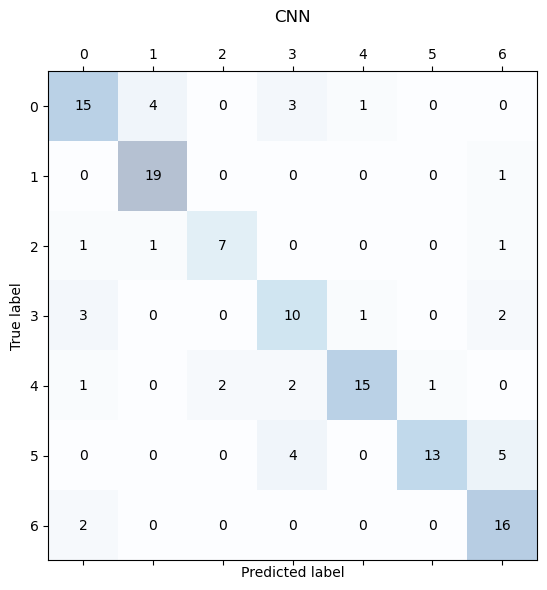

In [23]:
cm = confusion_matrix(y_true = y_test, y_pred = y_predict)

fig, ax = plt.subplots(figsize=(6, 6))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center')

ax.title.set_text('CNN\n')
plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.savefig("ConfusionMatrix.png", dpi=300, format='png', pad_inches=0.3)
plt.show()

{0, 1, 2, 3, 4, 5, 6}

['african-wildcat' 'blackfoot-cat' 'chinese-mountain-cat' 'domestic-cat'
 'european-wildcat' 'jungle-cat' 'sand-cat']

### Precision, Recall, F1- Score

In [24]:
from sklearn.metrics import precision_score, recall_score, f1_score

pScore = precision_score(y_true= y_test, y_pred = y_predict, average = 'weighted')
print("Precision: ", pScore)

rScore = recall_score(y_true= y_test, y_pred = y_predict, average = 'weighted')
print("Recall: ", rScore)

fScore = f1_score(y_true= y_test, y_pred = y_predict, average = 'weighted')
print("F1-score: ", fScore)

Precision:  0.7553228085983503
Recall:  0.7307692307692307
F1-score:  0.7306194145851428


In [25]:
# Saves the best model obtained
model_FT3.save('/content/drive/MyDrive/DL_Models/03_Xception_FineTuned_Best_Model.h5')